In [1]:
# import all relevant libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import pathlib
import glob

import wfdb

from fastai.tabular.all import *
from tsai.all import *

import sys



# assign the correct path to downloaded data and filenames
# realpath is this script path, while data is subfolder in the same dir
# parent_dir =  os.path.dirname(os.path.realpath(__file__))

parent_dir = pathlib.Path(os.path.abspath('')).parents[0]
data_dir = os.path.join(parent_dir, 'data\\')
raw_dir = os.path.join(parent_dir, 'data\\raw\\')
processed_dir = os.path.join(parent_dir, 'data\\processed\\')

sys.path.append(os.path.join(parent_dir, 'preprocessing/'))

filenames = []

for i in range(10):
    filenames.append('infant'+str(i+1))

# print and list all relevant filenames, as a quick check
print(parent_dir)
print(data_dir)
print(processed_dir)
print(filenames)


def describe_df(df):
    desc = df.describe()
    desc.loc['count'] = desc.loc['count'].astype(int).astype(str)
    desc.loc['nunique'] = df.nunique()
    desc.loc['count_na'] = df.isna().sum()
    desc.iloc[1:] = desc.iloc[1:].applymap('{:.6f}'.format)
    print(desc)


f:\Education\ecg_resp
f:\Education\ecg_resp\data\
f:\Education\ecg_resp\data\processed\
['infant1', 'infant2', 'infant3', 'infant4', 'infant5', 'infant6', 'infant7', 'infant8', 'infant9', 'infant10']


In [2]:
import self_shared as ss


In [3]:
dfg_all_files = glob.glob(os.path.join(processed_dir, "dfg2_infant*.csv"))
tsf_all_files = glob.glob(os.path.join(processed_dir, "tsf2_infant*.csv"))


def get_file_id(fullpath):
    # get filename without path and extension, e.g. dfg2_infant10_0
    file_id = pathlib.Path(fullpath).stem
    # dfg2_infant10_0 -> [dfg2_, 10_0]
    file_id = file_id.split('infant')[1]
    return file_id

dfg = pd.concat((
    pd.read_csv(f,converters={
    'resp': lambda s: [float(x.strip(' []')) for x in s.split(',')]}
    ).assign(file_id=get_file_id(f) )
    for f in dfg_all_files), ignore_index=True)

dfg = dfg.dropna()




In [4]:

tsf = pd.concat((
    pd.read_csv(f).assign(file_id=get_file_id(f))
    for f in tsf_all_files), ignore_index=True)

tsf = tsf.dropna()


In [5]:
dfg

id  \
0         6.0   
1         7.0   
2         8.0   
3         9.0   
4        10.0   
...       ...   
133005  962.0   
133006  963.0   
133007  964.0   
133008  965.0   
133009  966.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           resp  \
0       [30.00555345570644, 29.874836591350626, 29.80947815917272, 29.749147298700805, 29.611391833956603, 29.619435948686192, 29.611391833956603, 29.7561858990892, 30.135264805721054, 30.71444106625143, 31.23127543762749, 31.48667608029193, 31.866760501264988, 32.18751957610733, 32.64301757267028, 32.960760104489026, 33.28252469367257, 33.60831134022091, 33.867734040250134, 33.99744539026475, 34.18748760075128, 34.511263218617216, 34.70231094344495, 34.896375211296274, 35.02608656131088, 35.0854119074416, 35.216128771797415, 35.355895265224014, 35.41320958267234, 35.53085476059257, 35.47756250050...   
1       [35.28349823265772, 35.15981996869029, 34.95570055742699, 34.63695251126704, 34.32323203681309, 33.67568080108121, 33.02511302232573, 32.324269526510335, 31.998482879962, 31.61236537294175, 31.610354344259356, 31.73805466559157, 32.06384131213991, 32.38158384395865, 33.03516816573772, 33.54798047974899, 34.06582036546625, 34.25485706161158, 34.63896353994944, 34.95570055742699, 35.153786882643104, 35.224172886527, 35.477562500509045, 35.60325179315886, 35.54090990400455, 35.147753796595914, 34.95771158610938, 34.25083500424679, 33.34587209716808, 32.51531725133806, 32.12618320129422, 31.67...   
2       [32.647039630035074, 33.09248248318604, 33.54999150843139, 33.99744539026475, 34.448921329462905, 34.63695251126704, 35.03010861867568, 35.545937475710545, 35.8586524358233, 35.99037481452031, 36.25080302889074, 36.43782869635368, 36.57357313241548, 36.631892964204994, 36.50419264287278, 36.18443908237163, 35.538898875322154, 34.886320067884284, 34.57259959343033, 33.99141230421756, 33.53591430765461, 33.08041631109166, 32.95472701844184, 32.71139254787178, 32.44995881916016, 32.32024746914554, 32.317230926121944, 32.25991660867363, 32.122161143929425, 32.06183028345751, 31.930107904760497...   
3       [32.39365001605304, 32.647039630035074, 32.84512595525119, 33.03114610837293, 33.09650454055083, 33.152813343657954, 33.22420486188305, 33.21616074715347, 33.152813343657954, 33.02310199364334, 32.9114899017703, 32.709381519189385, 32.7013374044598, 32.70737049050699, 32.83507081183921, 33.02511302232573, 33.22018280451826, 33.28453572235497, 33.41223604368719, 33.604289282856115, 33.60630031153851, 33.72997857550593, 33.73601166155312, 33.80338112241343, 33.671658743716414, 33.48061101888869, 33.34788312585048, 32.96679319053622, 32.57162605444518, 32.19154163347213, 32.12417217261182, 31...   
4       [37.28346625730167, 37.34681366079718, 37.53082278523652, 37.97727115272868, 38.499133095810734, 38.83095282840626, 39.40811806025424, 39.91489728821832, 40.18739167468313, 40.242694963449054, 40.30704788128576, 40.12303875684642, 39.98729432078461, 39.98930534946701, 40.05164723862132, 40.05164723862132, 39.98729432078461, 39.86361605681719, 39.7871969668861, 39.79121902425089, 39.795241081615686, 39.72183853470819, 39.72586059207299, 39.52576323817447, 39.341754113735135, 39.20399864899093, 39.016972981528, 38.88625611717219, 38.57153012837704, 38.37143277447852, 38.2437324531463, 38.243...   
...                                                                                                                                         

In [6]:
tsf

resp__cwt_coefficients__coeff_5__w_2__widths_(2, 5, 10, 20)  \
1                                                          5.219895   
2                                                          4.375986   
3                                                          4.664048   
4                                                          4.723307   
5                                                          3.937621   
...                                                             ...   
133851                                                     3.560755   
133853                                                     3.793635   
133854                                                     3.683882   
133855                                                     3.879991   
133856                                                     3.283156   

        resp__cwt_coefficients__coeff_4__w_5__widths_(2, 5, 10, 20)  \
1                                                         40.339770   
2                                                         36.418149   
3                                                         37.368961   
4                                                         41.373390   
5                                                         35.777981   
...                                                             ...   
133851                                                    30.679295   
133853                                                    33.183123   
133854                                                    32.266549   
133855                                                    33.211165   
133856                                                    29.131228   

        resp__cwt_coefficients__coeff_3__w_2__widths_(2, 5, 10, 20)  \
1                                                         22.374180   
2                                                         19.394474   
3                                                         19.695010   
4                                                         21.496466   
5                                                         18.990513   
...                                                             ...   
133851                                                    16.602363   
133853                                                    17.861171   
133854                                                    17.215520   
133855                                                    17.446676   
133856                                                    15.664687   

        resp__cwt_coefficients__coeff_4__w_2__widths_(2, 5, 10, 20)  \
1                                                         12.609894   
2                                                         10.738447   
3                                                         11.005248   
4                                                         11.642075   
5                                                         10.227387   
...                                                             ...   
133851                                                     9.057053   
133853                                                     9.746220   
133854                                                     9.389179   
133855                                                     9.601228   
133856                                                     8.430345   

        resp__cwt_coefficients__coeff_3__w_5__widths_(2, 5, 10, 20)  \
1                                                         36.085447   
2                                                         30.391100   
3                                                         32.116000   
4                                                         34.748783   
5                                                         31.051034   
...                                                             ...   
133851                                                    26.399714   
133853                      

In [7]:
dfg['resp_mean'] = dfg['resp'].apply(lambda x: np.mean(x))
dfg['resp_min'] = dfg['resp'].apply(lambda x: np.min(x))
dfg['resp_max'] = dfg['resp'].apply(lambda x: np.max(x))
dfg['resp_std'] = dfg['resp'].apply(lambda x: np.std(x))

dfg['rr'] = pd.to_numeric(dfg['rr'])
dfg['hr'] = pd.to_numeric(dfg['hr'])


# change hr position
column_to_move = dfg.pop("hr")
dfg.insert(0, "hr", column_to_move)


In [8]:
# filter data
dfg = dfg[(dfg['rr'] < 500) & (dfg['rr'] > 10)]
dfg = dfg[(dfg['hr'] < 200) & (dfg['rr'] > 10)]
dfg = dfg[(dfg['resp_max'] < 50) & (dfg['resp_min'] > 10)]


In [9]:
dfg


hr     id  \
0       139.830508    6.0   
1       157.563025    7.0   
2       147.540984    8.0   
3       149.688150    9.0   
4       145.877378   10.0   
...            ...    ...   
133005  143.790850  962.0   
133006  144.050104  963.0   
133007  141.630901  964.0   
133008  137.787056  965.0   
133009  135.802469  966.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           resp  \
0       [30.00555345570644, 29.874836591350626, 29.80947815917272, 29.749147298700805, 29.611391833956603, 29.619435948686192, 29.611391833956603, 29.7561858990892, 30.135264805721054, 30.71444106625143, 31.23127543762749, 31.48667608029193, 31.866760501264988, 32.18751957610733, 32.64301757267028, 32.960760104489026, 33.28252469367257, 33.60831134022091, 33.867734040250134, 33.99744539026475, 34.18748760075128, 34.511263218617216, 34.70231094344495, 34.896375211296274, 35.02608656131088, 35.0854119074416, 35.216128771797415, 35.355895265224014, 35.41320958267234, 35.53085476059257, 35.47756250050...   
1       [35.28349823265772, 35.15981996869029, 34.95570055742699, 34.63695251126704, 34.32323203681309, 33.67568080108121, 33.02511302232573, 32.324269526510335, 31.998482879962, 31.61236537294175, 31.610354344259356, 31.73805466559157, 32.06384131213991, 32.38158384395865, 33.03516816573772, 33.54798047974899, 34.06582036546625, 34.25485706161158, 34.63896353994944, 34.95570055742699, 35.153786882643104, 35.224172886527, 35.477562500509045, 35.60325179315886, 35.54090990400455, 35.147753796595914, 34.95771158610938, 34.25083500424679, 33.34587209716808, 32.51531725133806, 32.12618320129422, 31.67...   
2       [32.647039630035074, 33.09248248318604, 33.54999150843139, 33.99744539026475, 34.448921329462905, 34.63695251126704, 35.03010861867568, 35.545937475710545, 35.8586524358233, 35.99037481452031, 36.25080302889074, 36.43782869635368, 36.57357313241548, 36.631892964204994, 36.50419264287278, 36.18443908237163, 35.538898875322154, 34.886320067884284, 34.57259959343033, 33.99141230421756, 33.53591430765461, 33.08041631109166, 32.95472701844184, 32.71139254787178, 32.44995881916016, 32.32024746914554, 32.317230926121944, 32.25991660867363, 32.122161143929425, 32.06183028345751, 31.930107904760497...   
3       [32.39365001605304, 32.647039630035074, 32.84512595525119, 33.03114610837293, 33.09650454055083, 33.152813343657954, 33.22420486188305, 33.21616074715347, 33.152813343657954, 33.02310199364334, 32.9114899017703, 32.709381519189385, 32.7013374044598, 32.70737049050699, 32.83507081183921, 33.02511302232573, 33.22018280451826, 33.28453572235497, 33.41223604368719, 33.604289282856115, 33.60630031153851, 33.72997857550593, 33.73601166155312, 33.80338112241343, 33.671658743716414, 33.48061101888869, 33.34788312585048, 32.96679319053622, 32.57162605444518, 32.19154163347213, 32.12417217261182, 31...   
4       [37.28346625730167, 37.34681366079718, 37.53082278523652, 37.97727115272868, 38.499133095810734, 38.83095282840626, 39.40811806025424, 39.91489728821832, 40.18739167468313, 40.242694963449054, 40.30704788128576, 40.12303875684642, 39.98729432078461, 39.98930534946701, 40.05164723862132, 40.05164723862132, 39.98729432078461, 39.86361605681719, 39.7871969668861, 39.79121902425089, 39.795241081615686, 39.72183853470819, 39.72586059207299, 39.52576323817447, 39.341754113735135, 39.20399864899093, 39.016972981528, 38.88625611717219, 38.57153012837704, 38.37143277447852, 38.2437324531463, 38.243...   
.

In [10]:
dfm = pd.merge(dfg.drop(columns=['resp']), tsf, on=['id', 'hr', 'file_id'], how='left')
dfm = dfm.drop_duplicates()
dfm = dfm.dropna()
dfm


hr     id          rr file_id  resp_mean   resp_min  \
1       157.563025    7.0   51.948052    10_0  31.815165  29.485703   
2       147.540984    8.0   73.008850    10_0  33.579687  31.154856   
3       149.688150    9.0   84.782609    10_0  33.590510  30.838119   
4       145.877378   10.0  106.430155    10_0  32.855962  28.191606   
5       153.688525   11.0   70.422535    10_0  33.194501  30.642044   
...            ...    ...         ...     ...        ...        ...   
132679  155.172414  961.0   78.014184     9_9  28.399790  27.357176   
132681  144.050104  963.0   96.359743     9_9  28.578111  27.885497   
132682  141.630901  964.0   99.778271     9_9  28.592057  27.688891   
132683  137.787056  965.0   74.157303     9_9  28.590942  26.854012   
132684  135.802469  966.0   57.203390     9_9  28.392611  26.714245   

         resp_max  resp_std  \
1       36.056739  1.644011   
2       37.727904  1.726753   
3       38.120054  1.720453   
4       40.307048  2.708645   
5       38.171335  1.967516   
...           ...       ...   
132679  30.098484  0.577480   
132681  29.458348  0.347918   
132682  29.645637  0.458463   
132683  30.345407  0.616969   
132684  30.343543  0.626577   

        resp__cwt_coefficients__coeff_5__w_2__widths_(2, 5, 10, 20)  \
1                                                          5.219895   
2                                                          4.375986   
3                                                          4.664048   
4                                                          4.723307   
5                                                          3.937621   
...                                                             ...   
132679                                                     3.560755   
132681                                                     3.793635   
132682                                                     3.683882   
132683                                                     3.879991   
132684                                                     3.283156   

        resp__cwt_coefficients__coeff_4__w_5__widths_(2, 5, 10, 20)  ...  \
1                                                         40.339770  ...   
2                                                         36.418149  ...   
3                                                         37.368961  ...   
4                                                         41.373390  ...   
5                                                         35.777981  ...   
...                                                             ...  ...   
132679                                                    30.679295  ...   
132681                                                    33.183123  ...   
132682                                                    32.266549  ...   
132683                                                    33.211165  ...   
132684                                                    29.131228  ...   

        resp__sum_of_reoccurring_data_points  \
1                                8509.185599   
2                                9246.107579   
3                                9075.521662   
4                                6621.951444   
5                                7529.064058   
...                                      ...   
132679                           8903.061011   
132681                          11219.203509   
132682                           9909.187408   
132683                           8928.650865   
132684                           9016.530965   

        resp__augmented_dickey_fuller__attr_"pvalue"__autolag_"AIC"  \
1                                                      4.968337e-03   
2                                                      2.607279e-07   
3                                                      1.317197e-03   
4                                                      2.230854e-02   
5                                                      1.330730e-04   
...                  

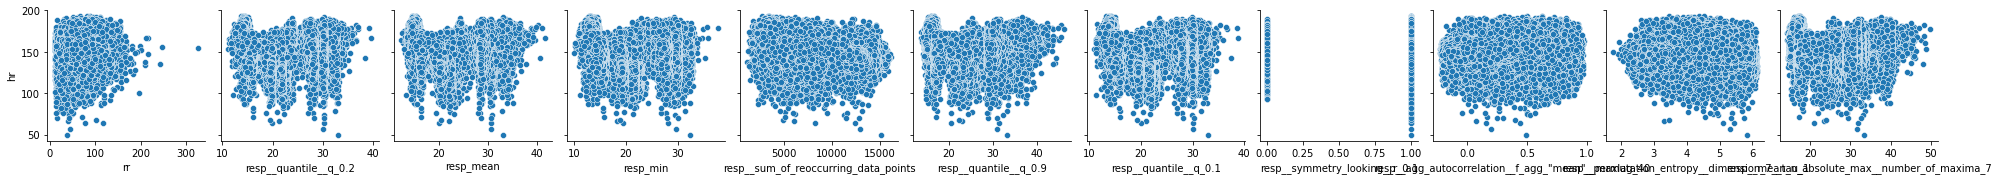

In [11]:
# g = sns.PairGrid(dfn.iloc[:, :10])
# g.map_diag(sns.histplot)
# g.map_offdiag(sns.scatterplot)

data = dfm
x_vars = [ 
            'rr',
            'resp__quantile__q_0.2',
            'resp_mean',
            'resp_min',
            'resp__sum_of_reoccurring_data_points',
            'resp__quantile__q_0.9',
            'resp__quantile__q_0.1',
            'resp__symmetry_looking__r_0.1',
            'resp__agg_autocorrelation__f_agg_"mean"__maxlag_40',
            'resp__permutation_entropy__dimension_7__tau_1',
            'resp__mean_n_absolute_max__number_of_maxima_7']
pp = sns.pairplot(data=data,
                  y_vars=['hr'],
                  x_vars=x_vars)


In [12]:
# find the relevant index to split data for infant 9 and 10
idx = dfm[dfm['file_id'] == '9_0'].first_valid_index()

dfm[idx-2:idx+2]


hr     id         rr file_id  resp_mean   resp_min   resp_max  \
132360  152.749491  637.0  50.000000     9_9  28.569492  27.055278  30.938021   
132361  150.905433  638.0  56.000000     9_9  28.458983  27.692618  29.010160   
132362  148.068670  639.0  47.244094     9_9  28.444478  27.745730  29.054886   
132363  146.044625  640.0  54.830287     9_9  28.430641  27.415878  29.259878   

        resp_std  resp__cwt_coefficients__coeff_5__w_2__widths_(2, 5, 10, 20)  \
132360  0.721368                                                     3.763756   
132361  0.292631                                                     3.346257   
132362  0.299437                                                     3.661939   
132363  0.353338                                                     3.703188   

        resp__cwt_coefficients__coeff_4__w_5__widths_(2, 5, 10, 20)  ...  \
132360                                                    32.513278  ...   
132361                                                    30.719723  ...   
132362                                                    32.064096  ...   
132363                                                    32.301156  ...   

        resp__sum_of_reoccurring_data_points  \
132360                           8904.269770   
132361                          11679.378373   
132362                          12148.442875   
132363                          11324.508470   

        resp__augmented_dickey_fuller__attr_"pvalue"__autolag_"AIC"  \
132360                                                 6.296647e-02   
132361                                                 1.206562e-07   
132362                                                 1.349404e-08   
132363                                                 1.078911e-08   

        resp__augmented_dickey_fuller__attr_"teststat"__autolag_"AIC"  \
132360                                                      -2.768169   
132361                                                      -6.061970   
132362                                                      -6.473428   
132363                                                      -6.514645   

        resp__variance  resp__standard_deviation  \
132360        0.520372                  0.721368   
132361        0.085633                  0.292631   
132362        0.089663                  0.299437   
132363        0.124848                  0.353338   

        resp__agg_autocorrelation__f_agg_"var"__maxlag_40  \
132360                                           0.051324   
132361                                           0.338456   
132362                                           0.388401   
132363                                           0.351854   

        resp__agg_autocorrelation__f_agg_"median"__maxlag_40  \
132360                                              0.601932   
132361                                             -0.104834   
132362                                             -0.184531   
132363                                             -0.266049   

        resp__agg_autocorrelation__f_agg_"mean"__maxlag_40  \
132360                                            0.632806   
132361                                           -0.011774   
132362                                           -0.050917   
132363                                           -0.074290   

        resp__variation_coefficient  resp__longest_strike_above_mean  
132360                     0.025250                            108.0  
132361                     0.010283                             46.0  
132362                     0.010527                             45.0  
132363                     0.012428                             69.0  

[4 rows x 241 columns]

In [13]:
# split data into train, test and blind dataset
from sklearn.model_selection import train_test_split


train_test_df = dfm[:idx]
blind_df = dfm[idx:]

# Load the data
dataset = train_test_df
dataset = dataset.select_dtypes(include=np.number)
dataset = dataset.dropna()

# # drop = ['hrs', 'sig_min', 'sig_mean', 'sig_max' ]
y_col = ['hr']
X, y = dataset.drop(columns=y_col), dataset[y_col]


# Splitting
train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                    test_size=0.3, random_state=123)


RMSE :  12.884301
R2 :  0.263571


<AxesSubplot:xlabel='y_actual', ylabel='y_pred'>

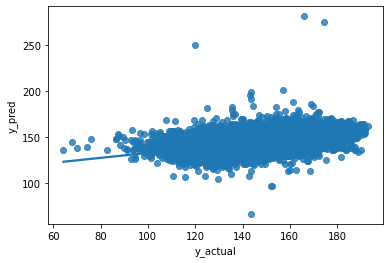

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score


sk_linear = LinearRegression()

# Fitting the model
sk_linear.fit(train_X, train_y)

# Predict the model
pred = sk_linear.predict(test_X)

# RMSE Computation
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" % (rmse))

# r2square compution
r2 = r2_score(test_y, pred)
print("R2 : % f" % (r2))

# plot prediction vs actual
dft = pd.DataFrame({'y_actual': test_y.values.flatten(),
                   'y_pred': pred.flatten()})
sns.regplot(data=dft, x='y_actual', y='y_pred')


RMSE :  12.884301
R2 : -0.143543


<AxesSubplot:xlabel='y_actual', ylabel='y_pred'>

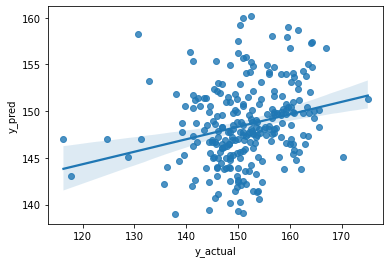

In [21]:
# blind testing
dataset = blind_df
dataset = dataset.select_dtypes(include=np.number)
dataset = dataset.dropna()

# # drop = ['hrs', 'sig_min', 'sig_mean', 'sig_max' ]
y_col = ['hr']
X, y = dataset.drop(columns=y_col), dataset[y_col]

y_col = ['hr']
blind_X, blind_y = dataset.drop(columns=y_col), dataset[y_col]

# Predict the model
blind_pred = sk_linear.predict(blind_X)

# RMSE Computation
blind_rmse = np.sqrt(MSE(blind_y, blind_pred))
print("RMSE : % f" % (rmse))

# r2square compution
blind_r2 = r2_score(blind_y, blind_pred)
print("R2 : % f" % (blind_r2))


dft = pd.DataFrame(
    {'y_actual': blind_y.values.flatten(), 'y_pred': blind_pred.flatten()})

sns.regplot(data=dft, x='y_actual', y='y_pred')


RMSE :  18.654220
R2 : -0.543703


<AxesSubplot:xlabel='y_actual', ylabel='y_pred'>

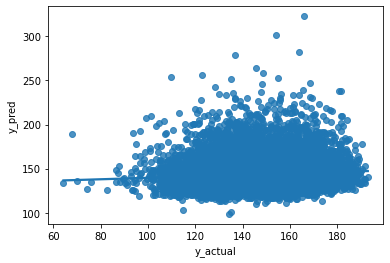

In [22]:
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score


sk_huber = HuberRegressor()

# Fitting the model
sk_huber.fit(train_X, train_y)

# Predict the model
pred = sk_huber.predict(test_X)

# RMSE Computation
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" % (rmse))

# r2square compution
r2 = r2_score(test_y, pred)
print("R2 : % f" % (r2))

# plot prediction vs actual
dft = pd.DataFrame({'y_actual': test_y.values.flatten(),
                   'y_pred': pred.flatten()})
sns.regplot(data=dft, x='y_actual', y='y_pred')


RMSE :  18.654220
R2 : -1.087194


<AxesSubplot:xlabel='y_actual', ylabel='y_pred'>

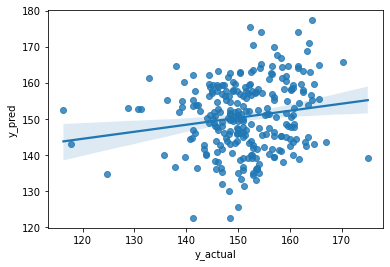

In [23]:
# blind testing
dataset = blind_df
dataset = dataset.select_dtypes(include=np.number)
dataset = dataset.dropna()

# # drop = ['hrs', 'sig_min', 'sig_mean', 'sig_max' ]
y_col = ['hr']
X, y = dataset.drop(columns=y_col), dataset[y_col]

y_col = ['hr']
blind_X, blind_y = dataset.drop(columns=y_col), dataset[y_col]

# Predict the model
blind_pred = sk_huber.predict(blind_X)

# RMSE Computation
blind_rmse = np.sqrt(MSE(blind_y, blind_pred))
print("RMSE : % f" % (rmse))

# r2square compution
blind_r2 = r2_score(blind_y, blind_pred)
print("R2 : % f" % (blind_r2))


dft = pd.DataFrame(
    {'y_actual': blind_y.values.flatten(), 'y_pred': blind_pred.flatten()})

sns.regplot(data=dft, x='y_actual', y='y_pred')


RMSE :  9.271714
R2 :  0.618645


<AxesSubplot:xlabel='y_actual', ylabel='y_pred'>

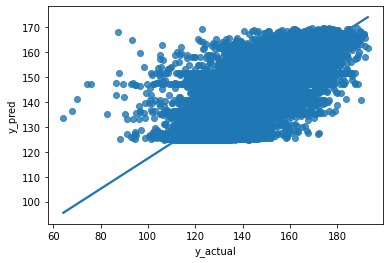

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_r = RandomForestRegressor(max_depth=5, random_state=42)

# Fitting the model
rf_r.fit(train_X, train_y)

# Predict the model
pred = rf_r.predict(test_X)

# RMSE Computation
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" % (rmse))

# r2square compution
r2 = r2_score(test_y, pred)
print("R2 : % f" % (r2))

# plot prediction vs actual
dft = pd.DataFrame({'y_actual': test_y.values.flatten(), 'y_pred': pred})
sns.regplot(data=dft, x='y_actual', y='y_pred')


RMSE :  9.271714
R2 : -0.231252


<AxesSubplot:xlabel='y_actual', ylabel='y_pred'>

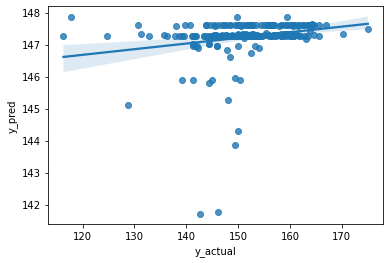

In [ ]:
# blind testing
dataset = blind_df
dataset = dataset.select_dtypes(include=np.number)
dataset = dataset.dropna()

# # drop = ['hrs', 'sig_min', 'sig_mean', 'sig_max' ]
y_col = ['hr']
X, y = dataset.drop(columns=y_col), dataset[y_col]

y_col = ['hr']
blind_X, blind_y = dataset.drop(columns=y_col), dataset[y_col]

# Predict the model
blind_pred = rf_r.predict(blind_X)

# RMSE Computation
blind_rmse = np.sqrt(MSE(blind_y, blind_pred))
print("RMSE : % f" % (rmse))

# r2square compution
blind_r2 = r2_score(blind_y, blind_pred)
print("R2 : % f" % (blind_r2))


dft = pd.DataFrame(
    {'y_actual': blind_y.values.flatten(), 'y_pred': blind_pred})

sns.regplot(data=dft, x='y_actual', y='y_pred')


RMSE :  9.083360
R2 :  0.633982


<AxesSubplot:xlabel='y_actual', ylabel='y_pred'>

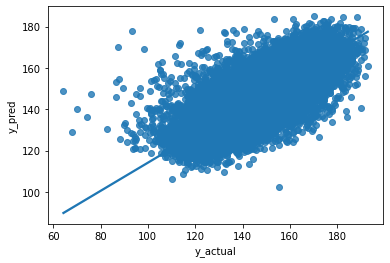

In [ ]:
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score



# set objective
# obj = 'reg:linear' # deprecated, change to squarederror
obj = 'reg:squarederror'
# obj = 'reg:pseudohubererror'

# Instantiation
xgb_r = xg.XGBRegressor(objective=obj,
                        n_estimators=1000, seed=123)

# Fitting the model
xgb_r.fit(train_X, train_y)

# Predict the model
pred = xgb_r.predict(test_X)

# RMSE Computation
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" % (rmse))

# r2square compution
r2 = r2_score(test_y, pred)
print("R2 : % f" % (r2))

# plot prediction vs actual
dft = pd.DataFrame({'y_actual': test_y.values.flatten(), 'y_pred': pred})
sns.regplot(data=dft, x='y_actual', y='y_pred')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'resp__quantile__q_0.2'),
  Text(1, 0, 'resp_mean'),
  Text(2, 0, 'resp_min'),
  Text(3, 0, 'resp__sum_of_reoccurring_data_points'),
  Text(4, 0, 'resp__quantile__q_0.9'),
  Text(5, 0, 'resp__quantile__q_0.1'),
  Text(6, 0, 'resp__mean_n_absolute_max__number_of_maxima_7'),
  Text(7, 0, 'resp__agg_autocorrelation__f_agg_"mean"__maxlag_40'),
  Text(8, 0, 'resp__permutation_entropy__dimension_7__tau_1'),
  Text(9, 0, 'resp__quantile__q_0.8')])

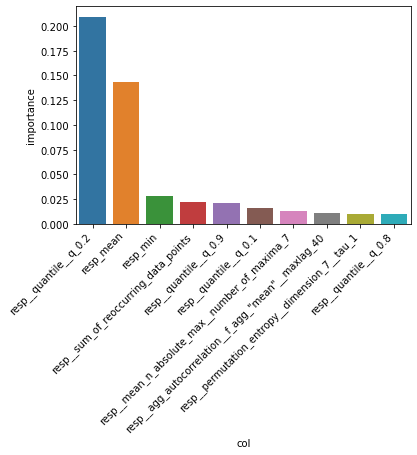

In [ ]:
df_importance = pd.DataFrame(
    {'col': train_X.columns, 'importance': xgb_r.feature_importances_})

# df_importance = df_importance[df_importance['importance'] > 0]
df_importance = df_importance.sort_values(by='importance', ascending=False)

# df_importance
sns.barplot(data=df_importance[:10], x='col', y='importance')
plt.xticks(rotation=45, ha='right')


RMSE :  9.083360
R2 : -0.010944


<AxesSubplot:xlabel='y_actual', ylabel='y_pred'>

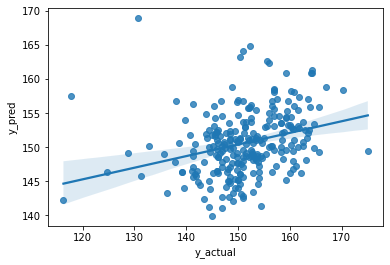

In [ ]:

# Load the data
dataset = blind_df
dataset = dataset.select_dtypes(include=np.number)
dataset = dataset.dropna()

# # drop = ['hrs', 'sig_min', 'sig_mean', 'sig_max' ]
y_col = ['hr']
X, y = dataset.drop(columns=y_col), dataset[y_col]

y_col = ['hr']
blind_X, blind_y = dataset.drop(columns=y_col), dataset[y_col]

# Predict the model
blind_pred = xgb_r.predict(blind_X)

# RMSE Computation
blind_rmse = np.sqrt(MSE(blind_y, blind_pred))
print("RMSE : % f" % (rmse))

# r2square compution
blind_r2 = r2_score(blind_y, blind_pred)
print("R2 : % f" % (blind_r2))


dft = pd.DataFrame(
    {'y_actual': blind_y.values.flatten(), 'y_pred': blind_pred})

sns.regplot(data=dft, x='y_actual', y='y_pred')
